### About the DataSet

### Importing Libraries

In [1]:
#Importing data Manipulation libraries
import pandas as pd
import numpy as np

#Importing Visualization libraries
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

#Importing Machine Learning Libraries
from sklearn.preprocessing import RobustScaler
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
pd.set_option('display.max_columns' , None)
warnings.simplefilter(action="ignore")

In [2]:
#Reading the dataset
df = pd.read_csv('diabetes.csv')

### Exploratory Data Analysis

In [3]:
#Viewing the top 5 entries of the dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Checking the bottom entries of the dataset
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
#Lets find out what consists of the dataset, the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
#Checking for the basic statistical meaning of the variables
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,5%,25%,50%,75%,90%,95%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.00000,1.00000,3.0000,6.00000,9.0000,10.00000,13.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,79.00000,99.00000,117.0000,140.25000,167.0000,181.00000,196.00000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,38.70000,62.00000,72.0000,80.00000,88.0000,90.00000,106.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,0.00000,23.0000,32.00000,40.0000,44.00000,51.33000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,0.00000,30.5000,127.25000,210.0000,293.00000,519.90000,846.00
BMI,768.0,31.992578,7.884160,0.000,21.80000,27.30000,32.0000,36.60000,41.5000,44.39500,50.75900,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.14035,0.24375,0.3725,0.62625,0.8786,1.13285,1.69833,2.42
Age,768.0,33.240885,11.760232,21.000,21.00000,24.00000,29.0000,41.00000,51.0000,58.00000,67.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.00000,0.0000,1.00000,1.0000,1.00000,1.00000,1.00


In [8]:
#target variable
df.Outcome.unique()


array([1, 0])

In [9]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

### Data Visualization

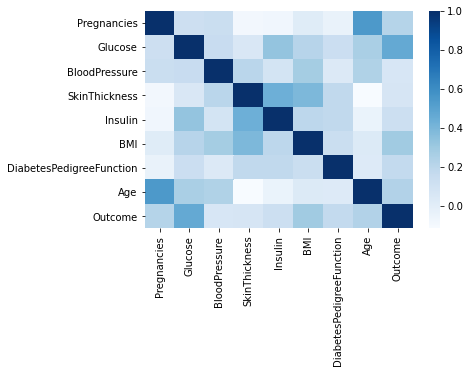

In [10]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), cmap='Blues', annot=False)

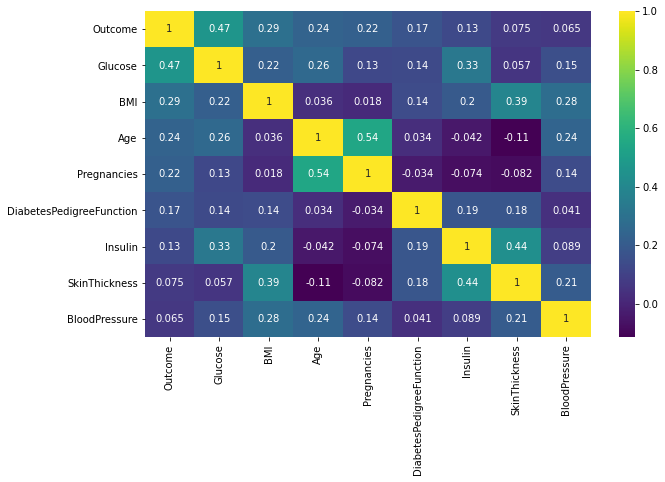

In [11]:
#Outcomes correlation Matrix
k = 9
cols  = df.corr().nlargest(k, 'Outcome')['Outcome'].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f73e86c0eb0>,
      dtype=object)

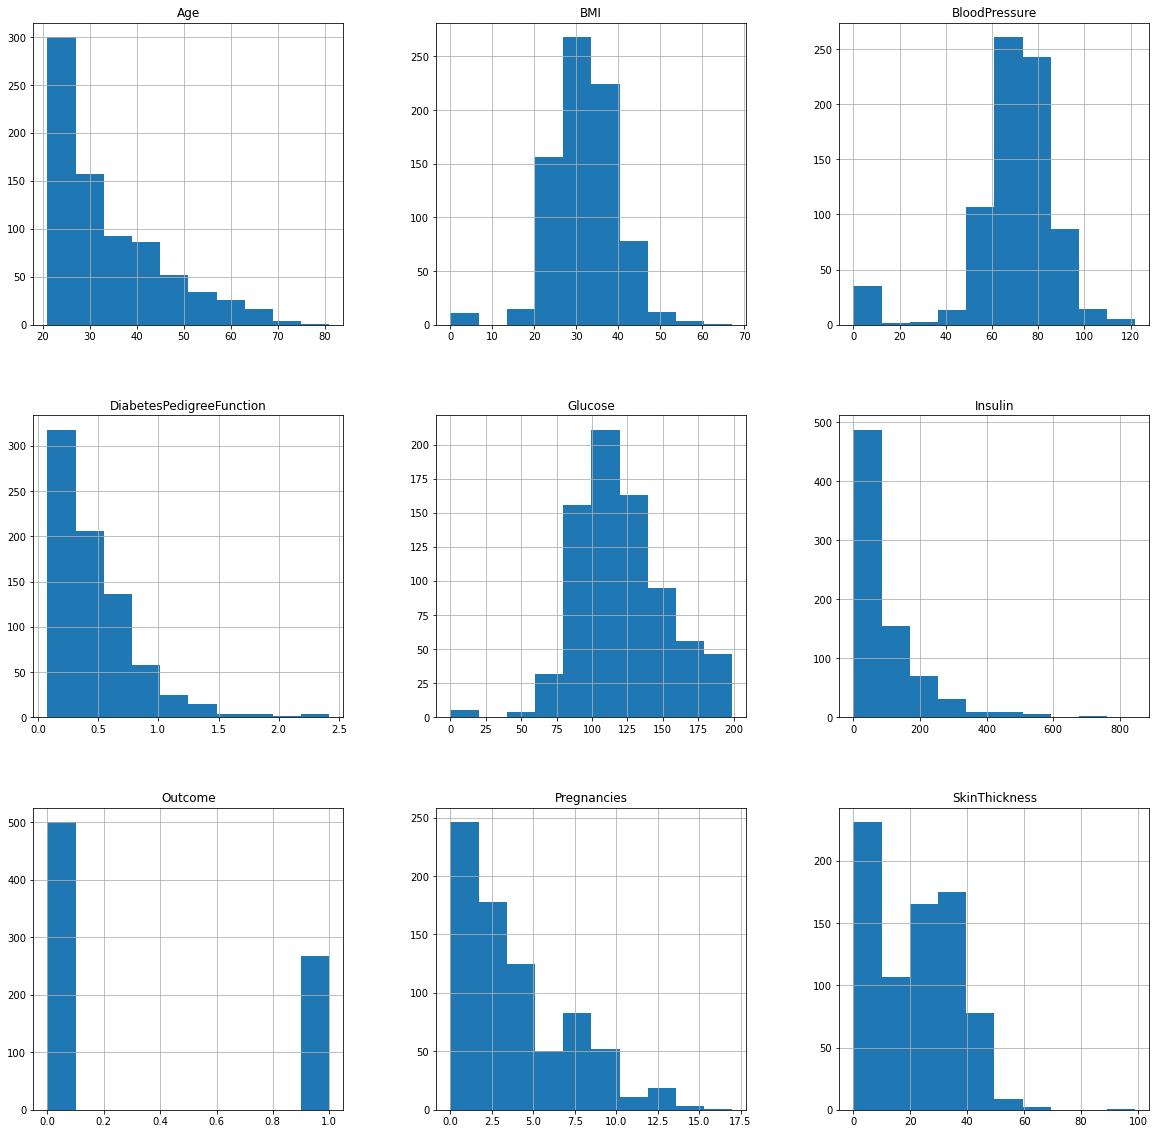

In [12]:
#lets see how the data is distributed
df.hist(figsize = (20,20))

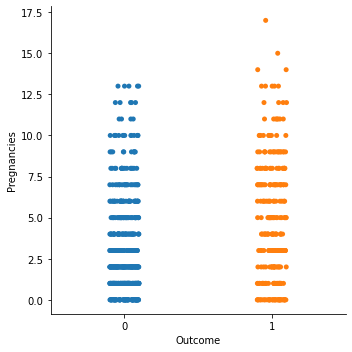

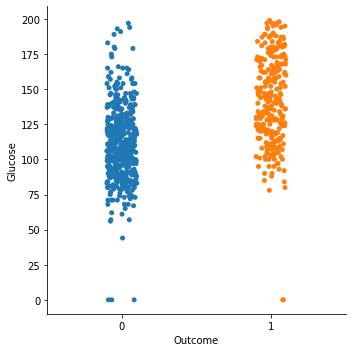

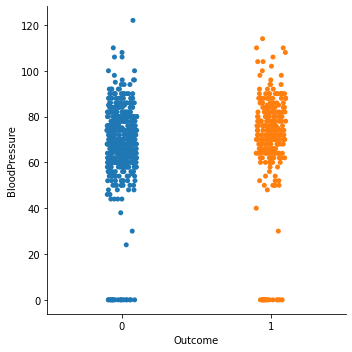

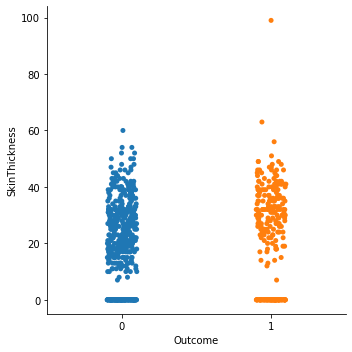

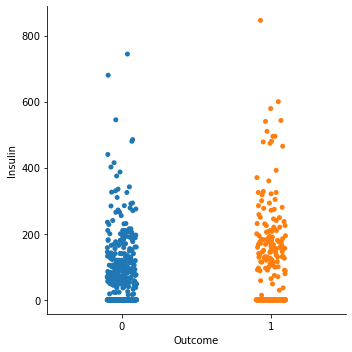

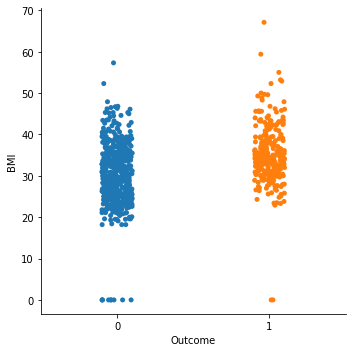

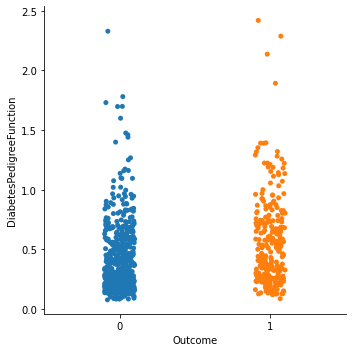

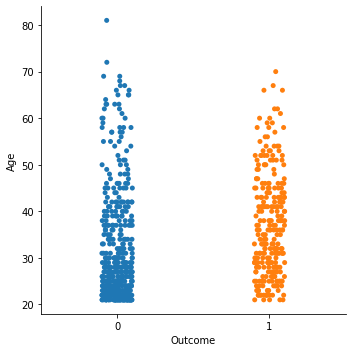

In [13]:
for col in df.columns:
    if col != "Outcome":
        sns.catplot("Outcome", col, data = df)

### Data preprocessing

In [14]:
#observation units for variables with a minimum of zero are NAN, except the preganncy variable
df.describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,5%,25%,50%,75%,90%,95%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.00000,1.00000,3.0000,6.00000,9.0000,10.00000,13.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,79.00000,99.00000,117.0000,140.25000,167.0000,181.00000,196.00000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,38.70000,62.00000,72.0000,80.00000,88.0000,90.00000,106.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,0.00000,23.0000,32.00000,40.0000,44.00000,51.33000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,0.00000,30.5000,127.25000,210.0000,293.00000,519.90000,846.00
BMI,768.0,31.992578,7.884160,0.000,21.80000,27.30000,32.0000,36.60000,41.5000,44.39500,50.75900,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.14035,0.24375,0.3725,0.62625,0.8786,1.13285,1.69833,2.42
Age,768.0,33.240885,11.760232,21.000,21.00000,24.00000,29.0000,41.00000,51.0000,58.00000,67.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.00000,0.0000,1.00000,1.0000,1.00000,1.00000,1.00


In [15]:
# NAN values of 0 for Glucose, Blood Pressure, Skin Thickness, Insulin, BMI
#We can write NAN instaed of 0
cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in cols:
    df[col].replace(0,np.NaN,inplace=True)

##### Handling missing values

In [16]:
#Lets check for missing values
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [17]:
# We can fill the NaN values with a median according to the target
for col in df.columns:
    df.loc[(df["Outcome"]==0) & (df[col].isnull()), col] = df[df["Outcome"]==0][col].median()
    df.loc[(df["Outcome"]==1) & (df[col].isnull()), col] = df[df["Outcome"]==1][col].median()

In [18]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [19]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.10)
    quartile3  = dataframe[variable].quantile(0.90)
    interquartile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquartile_range
    low_limit = quartile1 - 1.5 * interquartile_range
    return low_limit, up_limit

In [20]:
def has_outliers(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    if dataframe[(dataframe[variable]< low_limit) | (dataframe[variable]>up_limit)]. any(axis=None):
        print(variable, "yes")

In [21]:
for col in df.columns:
    has_outliers(df, col)

SkinThickness yes
Insulin yes
DiabetesPedigreeFunction yes


In [22]:
def replace_with_thresholds(dataframe, numeric_columns):
    for variable in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, variable)
        dataframe.loc[(dataframe[variable]<low_limit), variable] = low_limit
        dataframe.loc[(dataframe[variable]>up_limit), variable] = up_limit

In [23]:
replace_with_thresholds(df, df.columns)

In [24]:
for col in df.columns:
    has_outliers(df, col)

In [25]:
df.describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,5%,25%,50%,75%,90%,95%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.00000,1.00000,3.0000,6.00000,9.0000,10.00000,13.00000,17.000
Glucose,768.0,121.677083,30.464161,44.000,80.00000,99.75000,117.0000,140.25000,167.0000,181.00000,196.00000,199.000
BloodPressure,768.0,72.389323,12.106039,24.000,52.00000,64.00000,72.0000,80.00000,88.0000,90.00000,106.00000,122.000
SkinThickness,768.0,29.055990,8.671056,7.000,14.35000,25.00000,28.0000,32.00000,40.0000,44.00000,51.33000,73.000
Insulin,768.0,138.839844,75.233052,14.000,50.00000,102.50000,102.5000,169.50000,210.0000,293.00000,424.50000,424.500
BMI,768.0,32.434635,6.880498,18.200,22.23500,27.50000,32.0500,36.60000,41.5000,44.39500,50.75900,67.100
DiabetesPedigreeFunction,768.0,0.470082,0.322171,0.078,0.14035,0.24375,0.3725,0.62625,0.8786,1.13285,1.69833,1.949
Age,768.0,33.240885,11.760232,21.000,21.00000,24.00000,29.0000,41.00000,51.0000,58.00000,67.00000,81.000
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.00000,0.0000,1.00000,1.0000,1.00000,1.00000,1.000


### Feature Engineering

In [26]:
df['New_Glucose_Class'] = pd.cut(x = df['Glucose'], bins=[0,139,200], labels = ["Normal","Prediabetes"])

In [27]:
df['New_BMI_Range'] = pd.cut(x = df['BMI'], bins = [0,18.5, 24.9,29.9, 100], labels = ["Underweight","Healthy","Overwheight","Obese"])

In [28]:
df["New_BloodPressure"] = pd.cut(x=df['BMI'], bins = [0,18.5,24.9,29.9,100], labels = ["Underweight","Healthy","Overwheight","Obese"])

In [29]:
df['New_SkinThickness'] = df['SkinThickness'].apply(lambda x: 1 if x <= 18.0 else 0)

In [30]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,New_Glucose_Class,New_BMI_Range,New_BloodPressure,New_SkinThickness
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50.0,1.0,Prediabetes,Obese,Obese,0
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31.0,0.0,Normal,Overwheight,Overwheight,0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32.0,1.0,Prediabetes,Healthy,Healthy,0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,Normal,Overwheight,Overwheight,0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.949,33.0,1.0,Normal,Obese,Obese,0


In [31]:
def one_hot_encoder(dataframe, categorical_columns, nan_as_category = False):
    original_columns = list(dataframe.columns)
    dataframe = pd.get_dummies(dataframe, columns=categorical_columns,
                              dummy_na = nan_as_category, drop_first = True)
    new_columns = [col for col in dataframe.columns if col not in original_columns]
    return dataframe, new_columns

In [32]:
categorical_columns = [col for col in df.columns
                      if len(df[col].unique()) <= 10
                      and col != "Outcome"]
categorical_columns

['New_Glucose_Class',
 'New_BMI_Range',
 'New_BloodPressure',
 'New_SkinThickness']

In [33]:
df, new_cols_ohe = one_hot_encoder(df,categorical_columns)
new_cols_ohe

['New_Glucose_Class_Prediabetes',
 'New_BMI_Range_Healthy',
 'New_BMI_Range_Overwheight',
 'New_BMI_Range_Obese',
 'New_BloodPressure_Healthy',
 'New_BloodPressure_Overwheight',
 'New_BloodPressure_Obese',
 'New_SkinThickness_1']

In [34]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,New_Glucose_Class_Prediabetes,New_BMI_Range_Healthy,New_BMI_Range_Overwheight,New_BMI_Range_Obese,New_BloodPressure_Healthy,New_BloodPressure_Overwheight,New_BloodPressure_Obese,New_SkinThickness_1
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50.0,1.0,1,0,0,1,0,0,1,0
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31.0,0.0,0,0,1,0,0,1,0,0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32.0,1.0,1,1,0,0,1,0,0,0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,0,0,1,0,0,1,0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.949,33.0,1.0,0,0,0,1,0,0,1,0


In [35]:
def robust_scaler(variable):
    var_median = variable.median()
    quartile1 = variable.quantile(0.25)
    quartile3 = variable.quantile(0.75)
    interquantile_range = quartile3 - quartile1
    if int(interquantile_range) == 0:
        quartile1 = variable.quantile(0.05)
        quartile3 = variable.quantile(0.95)
        interquantile_range = quartile3 - quartile1
        if int(interquantile_range) == 0:
            quartile1 = variable.quantile(0.01)
            quartile3 = variable.quantile(0.99)
            interquantile_range = quartile3 - quartile1
            z = (variable - var_median) / interquantile_range
            return round(z, 3)

        z = (variable - var_median) / interquantile_range
        return round(z, 3)
    else:
        z = (variable - var_median) / interquantile_range
    return round(z, 3)

In [36]:
like_num = [col for col in df.columns if df[col].dtypes != 'O' and len(df[col].value_counts()) < 10]
cols_need_scale = [col for col in df.columns if col not in new_cols_ohe
                   and col not in "Outcome"
                   and col not in like_num]

for col in cols_need_scale:
    df[col] = robust_scaler(df[col])

In [37]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,New_Glucose_Class_Prediabetes,New_BMI_Range_Healthy,New_BMI_Range_Overwheight,New_BMI_Range_Obese,New_BloodPressure_Healthy,New_BloodPressure_Overwheight,New_BloodPressure_Obese,New_SkinThickness_1
0,0.6,0.765,0.000,1.000,1.000,0.170,0.159,1.235,1.0,1,0,0,1,0,0,1,0
1,-0.4,-0.790,-0.375,0.143,0.000,-0.599,-0.013,0.118,0.0,0,0,1,0,0,1,0,0
2,1.0,1.630,-0.500,0.571,1.000,-0.962,0.187,0.176,1.0,1,1,0,0,1,0,0,0
3,-0.4,-0.691,-0.375,-0.714,-0.127,-0.434,-0.128,-0.471,0.0,0,0,1,0,0,1,0,0
4,-0.6,0.494,-2.000,1.000,0.978,1.214,0.983,0.235,1.0,0,0,0,1,0,0,1,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Pregnancies                    768 non-null    float64
 1   Glucose                        768 non-null    float64
 2   BloodPressure                  768 non-null    float64
 3   SkinThickness                  768 non-null    float64
 4   Insulin                        768 non-null    float64
 5   BMI                            768 non-null    float64
 6   DiabetesPedigreeFunction       768 non-null    float64
 7   Age                            768 non-null    float64
 8   Outcome                        768 non-null    float64
 9   New_Glucose_Class_Prediabetes  768 non-null    uint8  
 10  New_BMI_Range_Healthy          768 non-null    uint8  
 11  New_BMI_Range_Overwheight      768 non-null    uint8  
 12  New_BMI_Range_Obese            768 non-null    uin

### MODELING

In [39]:
X = df.drop("Outcome",axis=1)
y = df["Outcome"]

In [40]:
models = [('LR', LogisticRegression()),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier()),
          ('RF', RandomForestClassifier()),
          ('SVR', SVC(gamma='auto')),
          ('XGBM', XGBClassifier()),
          ('GB',GradientBoostingClassifier()),
          ("LightGBM", LGBMClassifier())]

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=123456, shuffle = True)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.781152 (0.050398)
KNN: 0.850205 (0.052280)
CART: 0.854135 (0.042969)
RF: 0.876247 (0.036181)
SVR: 0.855451 (0.048818)
[20:51:44] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:51:44] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:51:44] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:51:45] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objec

### Model Tuning

In [41]:
#Let's choose the highest 4 models
# GBM
gbm_model = GradientBoostingClassifier()
# Model Tuning
gbm_params = {"learning_rate": [0.01, 0.1, 0.001],
               "max_depth": [3,5, 8, 10],
               "n_estimators": [200, 500, 1000],
               "subsample": [1, 0.5, 0.8]}
gbm_cv_model = GridSearchCV(gbm_model,
                            gbm_params,
                            cv=10,
                            n_jobs=-1,
                            verbose=2).fit(X, y)
gbm_cv_model.best_params_
# Final Model
gbm_tuned = GradientBoostingClassifier(**gbm_cv_model.best_params_).fit(X,y)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


In [42]:
# LightGBM: 
lgb_model = LGBMClassifier()
# Model Tuning
lgbm_params = lgbm_params = {"learning_rate": [0.01, 0.5, 1],
                             "n_estimators": [200, 500, 1000],
                             "max_depth": [6, 8, 10],
                             "colsample_bytree": [1, 0.5, 0.4 ,0.3 , 0.2]}
lgbm_cv_model = GridSearchCV(lgb_model,
                             lgbm_params,
                             cv=10,
                             n_jobs=-1,
                             verbose=2).fit(X, y)
lgbm_cv_model.best_params_
# Final Model
lgbm_tuned = LGBMClassifier(**lgbm_cv_model.best_params_).fit(X, y)

Fitting 10 folds for each of 135 candidates, totalling 1350 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [43]:
# Random Forests:
rf_model = RandomForestClassifier()
# Model Tuning
rf_params = {"n_estimators" :[100,200,500,1000], 
             "max_features": [3,5,7], 
             "min_samples_split": [2,5,10,30],
            "max_depth": [3,5,8,None]}
rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv=10, 
                           n_jobs=-1, 
                           verbose=2).fit(X, y)
rf_cv_model.best_params_
# Final Model
rf_tuned = RandomForestClassifier(**rf_cv_model.best_params_).fit(X, y)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


In [44]:
# XGB
xgb_model = XGBClassifier()
# Model Tuning
xgb_params = {
    "learning_rate": [0.01, 0.1, 0.2, 1],
    "min_samples_split": np.linspace(0.1, 0.5, 10),
    "max_depth":[3,5,8],
    "subsample":[0.5, 0.9, 1.0],
    "n_estimators": [100,1000]}
xgb_cv_model  = GridSearchCV(xgb_model,
                             xgb_params, 
                             cv = 10, 
                             n_jobs = -1, 
                             verbose = 2).fit(X,y)
xgb_cv_model.best_params_
xgb_tuned = XGBClassifier(**xgb_cv_model.best_params_).fit(X,y)

Fitting 10 folds for each of 720 candidates, totalling 7200 fits
[07:24:27] WARNING: ../src/learner.cc:541: 
Parameters: { min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[07:24:27] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:24:27] WARNING: ../src/learner.cc:541: 
Parameters: { min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[07:24:27

In [46]:
# evaluate each model in turn
models = [('RF', rf_tuned),
          ('GBM',gbm_tuned ),
          ("LightGBM", lgbm_tuned),
          ("XGB",xgb_tuned)]
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=123456, shuffle=True)
    cv_results = cross_val_score(model, X, y, cv=10, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

RF: 0.884159 (0.031911)
GBM: 0.899761 (0.029136)
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad 